# FAIRNESS ANALYSIS FOR 5 MODELS

LLM Disclaimer: Debugging was done with the help of ChatGPT: https://chatgpt.com/

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from fairness_analysis import do_bootstrap_for_metrics_and_fairness_binary, get_metrics_after_bootstrap, plot_medians_CIs_for_groups_whole_dataset, plot_metrics_folds_all_data_and_worst_group_median, plot_fairness_metrics  

# IMAGE LEVEL

# RETFound ft on BD mini eval in BD mini

In [3]:
#with open("RF_folds_BD_mini_01_val_BD_mini.pkl", "rb") as f:
    #folds_BD_mini_01_val_BD_mini = pickle.load(f)

In [4]:
#fairness_data_age_groups_folds_BD_mini_01_val_BD_mini = do_bootstrap_for_metrics_and_fairness_binary(folds_BD_mini_01_val_BD_mini, logits=True)

In [5]:
#groups, overall, fairness = get_metrics_after_bootstrap(fairness_data_age_groups_folds_BD_mini_01_val_BD_mini)

### Medians and CIs for each group: age groups

In [6]:
#plot_medians_CIs_for_groups_whole_dataset(groups, groups="age-groups")

In [7]:
#plot_metrics_folds_all_data_and_worst_group_median(overall, groups="age-groups")

In [8]:
#plot_fairness_metrics(fairness, groups="age-groups")

In [9]:
#fairness_data_age_groups_folds_BD_mini_01_val_BD_mini = do_bootstrap_for_metrics_and_fairness_binary(folds_BD_mini_01_val_BD_mini, group_col='patient_sex', logits=True)

In [10]:
#groups_sex, overall_sex, fairness_sex = get_metrics_after_bootstrap(fairness_data_age_groups_folds_BD_mini_01_val_BD_mini)

### Medians and CIs for each group: sex groups

In [11]:
#plot_medians_CIs_for_groups_whole_dataset(groups_sex, groups="patient_sex")
#plot_metrics_folds_all_data_and_worst_group_median(overall_sex, groups="patient_sex")
#plot_fairness_metrics(fairness_sex, groups="patient_sex")

# MG No NOISE mini BD - mini BD

In [12]:
#MG_BD_mini_BD_mini_01_no_noise = pd.read_csv("MEDGEMMA/BD_mini_MG_output_01_noise_no_just_labels.csv")
#bd_mini_old = pd.read_csv("mini_brazilian_dataset_old.csv")

In [13]:
#cols_to_add = [
    #"full_path",
    #"camera",
    #"image_id",
    #"patient_sex",
    #"DR_SDRG",
    #"DR_ICDR",
    #"diabetic_retinopathy",
    #"quality",
    #"age_group",
#]

#MG_BD_mini_BD_mini_01_no_noise = MG_BD_mini_BD_mini_01_no_noise.merge(
    #bd_mini_old[cols_to_add],
    #left_on="image_path",
    #right_on="full_path",
    #how="left"
#)

In [14]:
#MG_BD_mini_BD_mini_01_no_noise.rename(
    #columns={"prediction": "pred"},
    #inplace=True
#)

In [15]:
#mg_mini_BD_mini_BD_folds_dict = {}

#for fold in MG_BD_mini_BD_mini_01_no_noise['fold'].unique():
    #df_fold = MG_BD_mini_BD_mini_01_no_noise[MG_BD_mini_BD_mini_01_no_noise['fold'] == fold].copy()
    
    #key = f'fold{fold}_data_frame'
    
    #mg_mini_BD_mini_BD_folds_dict[key] = df_fold

#for k, v in mg_mini_BD_mini_BD_folds_dict.items():
    #print(k, v.shape)

In [16]:
#fairness_data_age_groups_folds_BD_mini_01_val_BD_mini = do_bootstrap_for_metrics_and_fairness_binary(mg_mini_BD_mini_BD_folds_dict, logits=False)

In [17]:
#groups_mg_age, overall_mg_age, fairness_mg_age = get_metrics_after_bootstrap(fairness_data_age_groups_folds_BD_mini_01_val_BD_mini)

In [18]:
#plot_medians_CIs_for_groups_whole_dataset(groups_mg_age, groups="age-groups")
#plot_metrics_folds_all_data_and_worst_group_median(overall_mg_age, groups="age-groups")
#plot_fairness_metrics(fairness_mg_age, groups="age-groups")

In [19]:
#fairness_data_age_groups_folds_BD_mini_01_val_BD_mini = do_bootstrap_for_metrics_and_fairness_binary(mg_mini_BD_mini_BD_folds_dict, group_col='patient_sex', logits=False)

In [20]:
#groups_mg_sex, overall_mg_sex, fairness_mg_sex = get_metrics_after_bootstrap(fairness_data_age_groups_folds_BD_mini_01_val_BD_mini)

In [21]:
#plot_medians_CIs_for_groups_whole_dataset(groups_mg_age, groups="patient_sex")
#plot_metrics_folds_all_data_and_worst_group_median(overall_mg_age, groups="patient_sex")
#plot_fairness_metrics(fairness_mg_age, groups="patient_sex")

# DeepSeek 1.3B tau=0.7, si, few-shot=1, knn

In [22]:
#ds_BD_mini_BD_mini_01_knn_shot_1_tau_07 = pd.read_csv("DEEPSEEK3B/DS3B_knn_shot1_long_version_si1_BD_mini_01/BD_mini_DS_tau_0.7_shot_1_01_long_version_si1.csv")

In [23]:
#ds_BD_mini_BD_mini_01_knn_shot_1_tau_07.head()

In [24]:
def convert_DS_df_to_folds_dict(df, n_folds=10):
    folds_dict = {}

    for i in range(n_folds):
        pred_col = f"output_binary_fold_{i}"

        if pred_col not in df.columns:
            continue

        df_fold = df[df[pred_col].notna()].copy()

        if df_fold.empty:
            continue

        fold_df = pd.DataFrame({
            "file_name": df_fold["image_id"].astype(str) + ".jpg",
            "label": df_fold["diabetic_retinopathy"],
            "pred": df_fold[pred_col].astype(int),
            "probs": df_fold[f"DS_conf_val_fold_{i}"],
            "logits": np.nan,
            "image_id": df_fold["image_id"],
            "camera": df_fold["camera"],
            "age_group": df_fold["age_group"],
            "patient_sex": df_fold["patient_sex"],
            "DR_SDRG": df_fold["DR_SDRG"],
            "DR_ICDR": df_fold["DR_ICDR"],
        })

        folds_dict[f"fold{i}_data_frame"] = fold_df.reset_index(drop=True)

    return folds_dict

In [25]:
#folds_DS_3B_BD_BD_01_shot_knn_1 = convert_DS_df_to_folds_dict(
    #ds_BD_mini_BD_mini_01_knn_shot_1_tau_07
#)

In [26]:
#fairness_data_age_groups_folds_BD_mini_01_val_BD_mini = do_bootstrap_for_metrics_and_fairness_binary(folds_DS_3B_BD_BD_01_shot_knn_1, logits=False)

In [27]:
#groups_ds_3b_age, overall_ds_3b_age, fairness_ds_3b_age = get_metrics_after_bootstrap(fairness_data_age_groups_folds_BD_mini_01_val_BD_mini)

In [28]:
#plot_medians_CIs_for_groups_whole_dataset(groups_ds_3b_age, groups="age-groups")
#plot_metrics_folds_all_data_and_worst_group_median(overall_ds_3b_age, groups="age-groups")
#plot_fairness_metrics(fairness_ds_3b_age, groups="age-groups")

In [29]:
#fairness_data_age_groups_folds_BD_mini_01_val_BD_mini = do_bootstrap_for_metrics_and_fairness_binary(folds_DS_3B_BD_BD_01_shot_knn_1, group_col='patient_sex', logits=False)

In [30]:
#groups_ds_3b_sex, overall_ds_3b_sex, fairness_ds_3b_sex = get_metrics_after_bootstrap(fairness_data_age_groups_folds_BD_mini_01_val_BD_mini)

In [31]:
#plot_medians_CIs_for_groups_whole_dataset(groups_ds_3b_sex, groups="patient_sex")
#plot_metrics_folds_all_data_and_worst_group_median(overall_ds_3b_sex, groups="patient_sex")
#plot_fairness_metrics(fairness_ds_3b_sex, groups="patient_sex")

# DS 7B

In [32]:
#ds7b__BD_mini_BD_mini_01_zs_short_tau_05 = pd.read_csv("DEEPSEEK7B/DS7B_shot0_short_prompt_version_si0_BD_mini_01/BD_mini_DS_tau_0.5_01_retry.csv")

In [33]:
#folds_ds7b__BD_mini_BD_mini_01_zs_short_tau_05 = convert_DS_df_to_folds_dict(
    #ds7b__BD_mini_BD_mini_01_zs_short_tau_05
#)

In [34]:
#fairness_data_age_groups_folds_BD_mini_01_val_BD_mini = do_bootstrap_for_metrics_and_fairness_binary(folds_ds7b__BD_mini_BD_mini_01_zs_short_tau_05, probs= True, logits=False)

In [35]:
#groups_ds_7b_age, overall_ds_7b_age, fairness_ds_7b_age = get_metrics_after_bootstrap(fairness_data_age_groups_folds_BD_mini_01_val_BD_mini)

In [36]:
#plot_medians_CIs_for_groups_whole_dataset(groups_ds_7b_age, groups="age-groups")
#plot_metrics_folds_all_data_and_worst_group_median(overall_ds_7b_age, groups="age-groups")
#plot_fairness_metrics(fairness_ds_7b_age, groups="age-groups")

In [37]:
#fairness_data_age_groups_folds_BD_mini_01_val_BD_mini = do_bootstrap_for_metrics_and_fairness_binary(folds_ds7b__BD_mini_BD_mini_01_zs_short_tau_05, group_col='patient_sex', probs= True, logits=False)

In [38]:
#groups_ds_7b_sex, overall_ds_7b_sex, fairness_ds_7b_sex = get_metrics_after_bootstrap(fairness_data_age_groups_folds_BD_mini_01_val_BD_mini)

In [39]:
#plot_medians_CIs_for_groups_whole_dataset(groups_ds_7b_sex, groups="patient_sex")
#plot_metrics_folds_all_data_and_worst_group_median(overall_ds_7b_sex, groups="patient_sex")
#plot_fairness_metrics(fairness_ds_7b_sex, groups="patient_sex")

# GEMINI

In [40]:
#gemini_07_01_no_cot_no_si = pd.read_csv("BD_full_Gemini_flash_tau0.7_01_final.csv")

In [41]:
def convert_gemini_df_to_folds_dict(df, n_folds=10):
    folds_dict = {}

    for i in range(n_folds):
        pred_col = f"gemini_answer_fold_{i}"

        if pred_col not in df.columns:
            continue

        df_fold = df[df[pred_col].notna()].copy()

        if df_fold.empty:
            continue

        pred = (df_fold[pred_col] != "Normal").astype(int)

        fold_df = pd.DataFrame({
            "file_name": df_fold["image_id"].astype(str) + ".jpg",
            "label": df_fold["diabetic_retinopathy"],
            "pred": pred,
            "probs": df_fold[f"gemini_conf_val_fold_{i}"],
            "logits": np.nan,
            "image_id": df_fold["image_id"],
            "camera": df_fold["camera"],
            "age_group": df_fold["age_group"],
            "patient_sex": df_fold["patient_sex"],
            "DR_SDRG": df_fold["DR_SDRG"],
            "DR_ICDR": df_fold["DR_ICDR"],
        })

        folds_dict[f"fold{i}_data_frame"] = fold_df.reset_index(drop=True)

    return folds_dict

In [42]:
#folds_gemini_07_01_no_cot_no_si = convert_gemini_df_to_folds_dict(
    #gemini_07_01_no_cot_no_si
#)

In [43]:
#fairness_data_age_groups_folds_BD_mini_01_val_BD_mini = do_bootstrap_for_metrics_and_fairness_binary(folds_gemini_07_01_no_cot_no_si, probs= True, logits=False)

In [44]:
#groups_gemini_age, overall_gemini_age, fairness_gemini_age = get_metrics_after_bootstrap(fairness_data_age_groups_folds_BD_mini_01_val_BD_mini)

In [45]:
#plot_medians_CIs_for_groups_whole_dataset(groups_gemini_age, groups="age-groups")
#plot_metrics_folds_all_data_and_worst_group_median(overall_gemini_age, groups="age-groups")
#plot_fairness_metrics(fairness_gemini_age, groups="age-groups")

In [46]:
#fairness_data_age_groups_folds_BD_mini_01_val_BD_mini = do_bootstrap_for_metrics_and_fairness_binary(folds_gemini_07_01_no_cot_no_si, group_col='patient_sex', probs= True, logits=False)

In [47]:
#groups_gemini_sex, overall_gemini_sex, fairness_gemini_sex = get_metrics_after_bootstrap(fairness_data_age_groups_folds_BD_mini_01_val_BD_mini)

In [48]:
#plot_medians_CIs_for_groups_whole_dataset(groups_gemini_sex, groups="patient_sex")
#plot_metrics_folds_all_data_and_worst_group_median(overall_gemini_sex, groups="patient_sex")
#plot_fairness_metrics(fairness_gemini_sex, groups="patient_sex")

# SUMMARY PLOTS

In [67]:
overall["model"] = "RETFound"
overall_mg_age["model"] = "MedGemma"
overall_ds_3b_age["model"] = "DeepSeek 3B"
overall_ds_7b_age["model"] = "DeepSeek 7B"
overall_gemini_age["model"] = "Gemini"

fairness["model"] = "RETFound"
fairness_mg_age["model"] = "MedGemma"
fairness_ds_3b_age["model"] = "DeepSeek 3B"
fairness_ds_7b_age["model"] = "DeepSeek 7B"
fairness_gemini_age["model"] = "Gemini"

overall_all_models_age = pd.concat([overall, overall_mg_age, overall_ds_3b_age, overall_ds_7b_age, overall_gemini_age], ignore_index=True)
fairness_all_models_age = pd.concat([fairness, fairness_mg_age, fairness_ds_3b_age, fairness_ds_7b_age, fairness_gemini_age], ignore_index=True)

In [68]:
def plot_overall_metrics_all_data_models(df_overall, groups="age-groups"):
    df = df_overall[df_overall["split"] == "all_data"]

    metrics = df["metric"].unique()
    models = df["model"].unique()

    n_metrics = len(metrics)
    nrows = 2
    ncols = math.ceil(n_metrics / nrows)

    fig, axes = plt.subplots(
        nrows,
        ncols,
        figsize=(5 * ncols, 4 * nrows),
        sharey=True
    )

    axes = axes.flatten()

    for i, metric in enumerate(metrics):
        ax = axes[i]

        for j, model in enumerate(models):
            rows = df[
                (df["metric"] == metric) &
                (df["model"] == model)
            ]

            if rows.empty:
                continue

            row = rows.iloc[0]

            handle = ax.errorbar(
                j,
                row["overall_median"],
                yerr=[
                    [row["overall_median"] - row["ci_low"]],
                    [row["ci_high"] - row["overall_median"]],
                ],
                fmt="o",
                capsize=5
            )

            color = handle[0].get_color()

            if not np.isnan(row["worst_group_median"]):
                ax.scatter(
                    j,
                    row["worst_group_median"],
                    marker="x",
                    s=80,
                    color=color,
                    linewidths=2
                )

        ax.set_title(metric)
        ax.set_xticks(range(len(models)))
        ax.set_xticklabels(models, rotation=45)
        ax.set_ylim(0, 1)
        ax.set_ylabel("Score")
        ax.grid(True, linestyle="--", alpha=0.6)

    for k in range(i + 1, len(axes)):
        fig.delaxes(axes[k])

    fig.suptitle(
        f"Overall metrics (ALL DATA), Groups: {groups}",
        fontsize=16
    )

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [69]:
def plot_fairness_metrics_all_data_models(df_fairness, groups="age-groups"):
    df = df_fairness[df_fairness["split"] == "all_data"]

    metrics = ["eo", "aod", "delta_fpr"]
    models = df["model"].unique()

    fig, axes = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))

    for i, metric in enumerate(metrics):
        ax = axes[i]

        for j, model in enumerate(models):
            row = df[df["model"] == model].iloc[0]

            mid = row[f"{metric}_ci_mid"]
            low = row[f"{metric}_ci_low"]
            high = row[f"{metric}_ci_high"]

            ax.errorbar(
                j,
                mid,
                yerr=[[mid - low], [high - mid]],
                fmt="o",
                capsize=5
            )

        ax.set_title(metric.upper())
        ax.set_xticks(range(len(models)))
        ax.set_xticklabels(models, rotation=45)
        ax.set_ylim(0, 1)
        ax.grid(True, linestyle="--", alpha=0.6)

    fig.suptitle(f"Fairness metrics (ALL DATA), Groups: {groups}", fontsize=16)
    plt.tight_layout()
    plt.show()


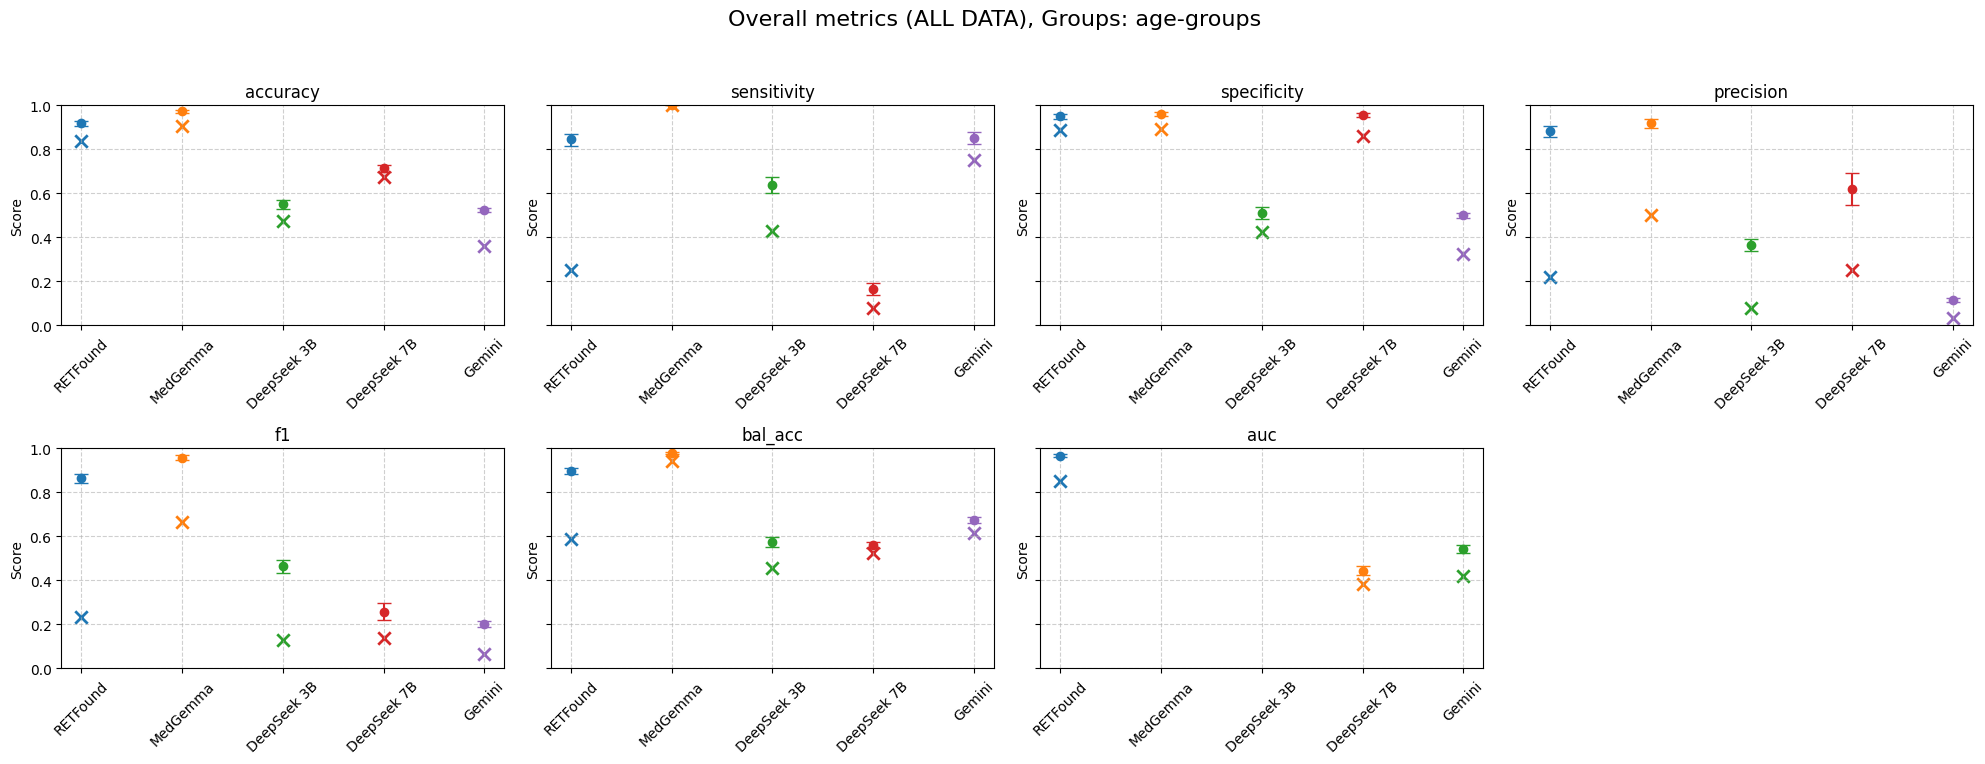

In [70]:
plot_overall_metrics_all_data_models(overall_all_models_age, groups="age-groups")

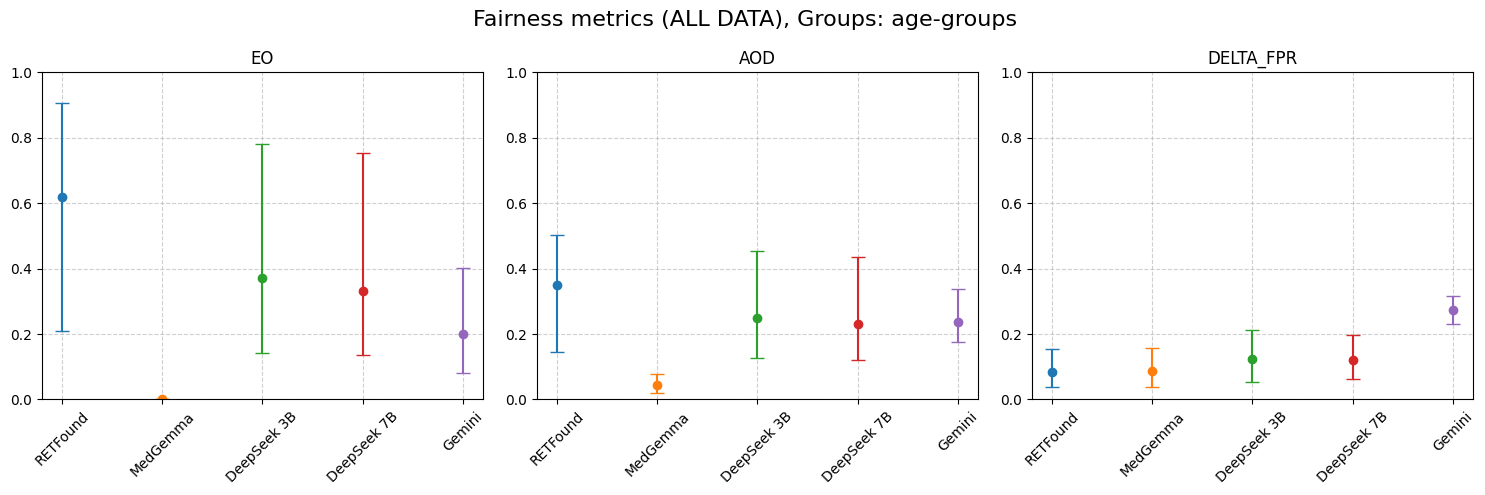

In [71]:
plot_fairness_metrics_all_data_models(fairness_all_models_age, groups="age-groups")

In [72]:
overall_sex["model"] = "RETFound"
overall_mg_sex["model"] = "MedGemma"
overall_ds_3b_sex["model"] = "DeepSeek 3B"
overall_ds_7b_sex["model"] = "DeepSeek 7B"
overall_gemini_sex["model"] = "Gemini"

fairness_sex["model"] = "RETFound"
fairness_mg_sex["model"] = "MedGemma"
fairness_ds_3b_sex["model"] = "DeepSeek 3B"
fairness_ds_7b_sex["model"] = "DeepSeek 7B"
fairness_gemini_sex["model"] = "Gemini"

overall_all_models_sex = pd.concat([overall_sex, overall_mg_sex, overall_ds_3b_sex, overall_ds_7b_sex, overall_gemini_sex], ignore_index=True)
fairness_all_models_sex = pd.concat([fairness_sex, fairness_mg_sex, fairness_ds_3b_sex, fairness_ds_7b_sex, fairness_gemini_sex], ignore_index=True)

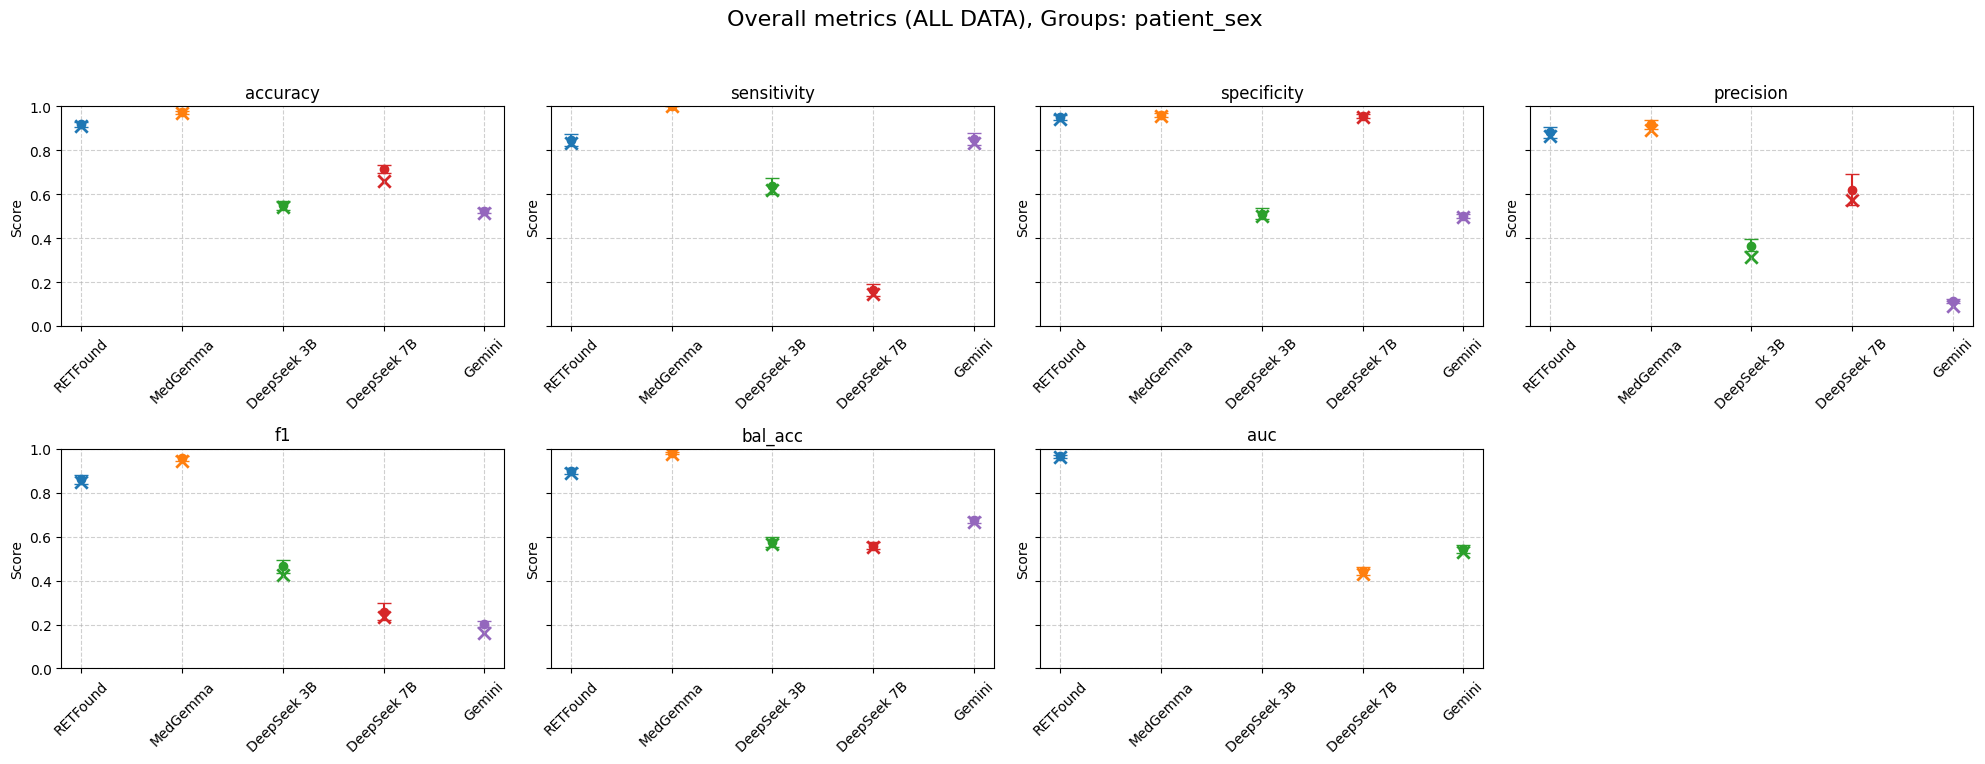

In [73]:
plot_overall_metrics_all_data_models(overall_all_models_sex, groups="patient_sex")

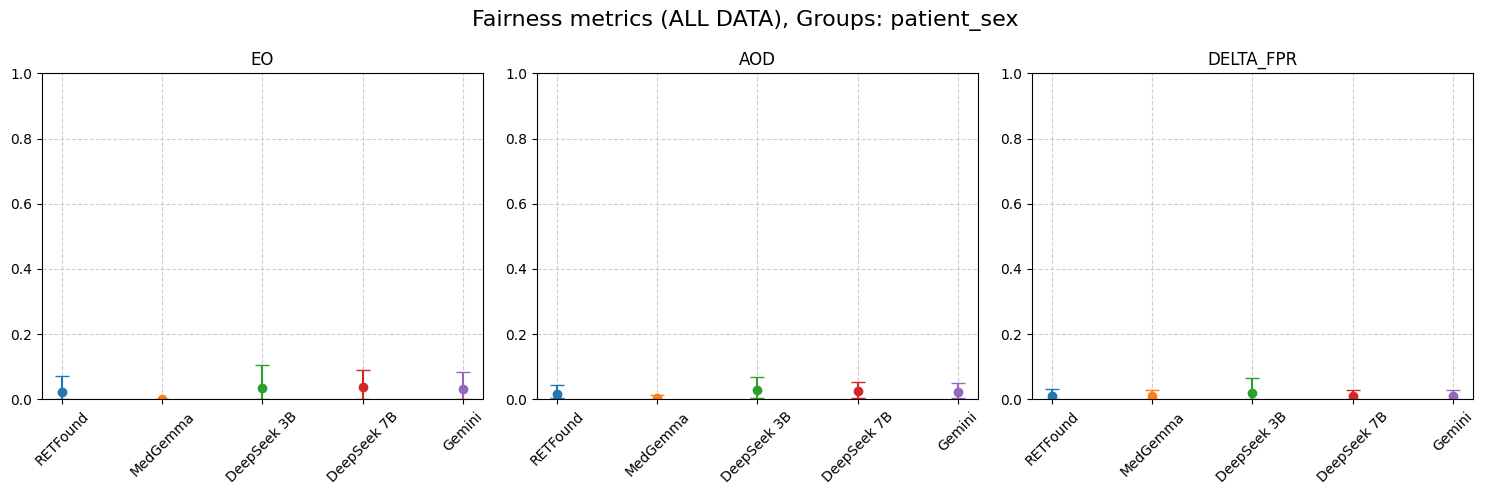

In [74]:
plot_fairness_metrics_all_data_models(fairness_all_models_sex, groups="patient_sex")

# PATIENT LEVEL

#### RF

In [49]:
#mini_brazilian_dataset_patient_level_1 = pd.read_csv("mini_brazilian_dataset_patient_level_1.csv")

In [50]:
#image_ids_to_keep_1 = set(mini_brazilian_dataset_patient_level_1['image_id'])

In [51]:
#for fold_name, df in folds_BD_mini_01_val_BD_mini.items():
    #folds_BD_mini_01_val_BD_mini[fold_name] = df[df['image_id'].isin(image_ids_to_keep_1)]

In [52]:
#fairness_data_age_groups_folds_BD_mini_01_val_BD_mini_1 = do_bootstrap_for_metrics_and_fairness_binary(folds_BD_mini_01_val_BD_mini, logits=True)

In [53]:
#groups_1, overall_1, fairness_1 = get_metrics_after_bootstrap(fairness_data_age_groups_folds_BD_mini_01_val_BD_mini_1)

In [54]:
#fairness_data_age_groups_folds_BD_mini_01_val_BD_mini_1 = do_bootstrap_for_metrics_and_fairness_binary(folds_BD_mini_01_val_BD_mini, group_col='patient_sex', logits=True)

In [55]:
#groups_sex_1, overall_sex_1, fairness_sex_1 = get_metrics_after_bootstrap(fairness_data_age_groups_folds_BD_mini_01_val_BD_mini_1)

#### MG

In [56]:
#for fold_name, df in mg_mini_BD_mini_BD_folds_dict.items():
    #mg_mini_BD_mini_BD_folds_dict[fold_name] = df[df['image_id'].isin(image_ids_to_keep_1)]

In [57]:
#fairness_data_age_groups_folds_BD_mini_01_val_BD_mini_1 = do_bootstrap_for_metrics_and_fairness_binary(mg_mini_BD_mini_BD_folds_dict, logits=False)

In [58]:
#groups_mg_age_1, overall_mg_age_1, fairness_mg_age_1 = get_metrics_after_bootstrap(fairness_data_age_groups_folds_BD_mini_01_val_BD_mini_1)

In [59]:
#fairness_data_age_groups_folds_BD_mini_01_val_BD_mini_1 = do_bootstrap_for_metrics_and_fairness_binary(mg_mini_BD_mini_BD_folds_dict, group_col='patient_sex', logits=False)

In [60]:
#groups_mg_sex_1, overall_mg_sex_1, fairness_mg_sex_1 = get_metrics_after_bootstrap(fairness_data_age_groups_folds_BD_mini_01_val_BD_mini_1)

#### DS 1.3B

In [61]:
#for fold_name, df in folds_DS_3B_BD_BD_01_shot_knn_1.items():
    #folds_DS_3B_BD_BD_01_shot_knn_1[fold_name] = df[df['image_id'].isin(image_ids_to_keep_1)]

In [62]:
#fairness_data_age_groups_folds_BD_mini_01_val_BD_mini_1 = do_bootstrap_for_metrics_and_fairness_binary(folds_DS_3B_BD_BD_01_shot_knn_1, logits=False)

In [63]:
#groups_ds_3b_age_1, overall_ds_3b_age_1, fairness_ds_3b_age_1 = get_metrics_after_bootstrap(fairness_data_age_groups_folds_BD_mini_01_val_BD_mini_1)

In [64]:
#fairness_data_age_groups_folds_BD_mini_01_val_BD_mini_1 = do_bootstrap_for_metrics_and_fairness_binary(folds_DS_3B_BD_BD_01_shot_knn_1, group_col='patient_sex', logits=False)

In [65]:
#groups_ds_3b_sex_1, overall_ds_3b_sex_1, fairness_ds_3b_sex_1 = get_metrics_after_bootstrap(fairness_data_age_groups_folds_BD_mini_01_val_BD_mini_1)

#### DS 7B

In [66]:
#for fold_name, df in folds_ds7b__BD_mini_BD_mini_01_zs_short_tau_05.items():
    #folds_ds7b__BD_mini_BD_mini_01_zs_short_tau_05[fold_name] = df[df['image_id'].isin(image_ids_to_keep_1)]

In [67]:
#fairness_data_age_groups_folds_BD_mini_01_val_BD_mini_1 = do_bootstrap_for_metrics_and_fairness_binary(folds_ds7b__BD_mini_BD_mini_01_zs_short_tau_05, probs= True, logits=False)

In [68]:
#groups_ds_7b_age_1, overall_ds_7b_age_1, fairness_ds_7b_age_1 = get_metrics_after_bootstrap(fairness_data_age_groups_folds_BD_mini_01_val_BD_mini_1)

In [69]:
#fairness_data_age_groups_folds_BD_mini_01_val_BD_mini_1 = do_bootstrap_for_metrics_and_fairness_binary(folds_ds7b__BD_mini_BD_mini_01_zs_short_tau_05, group_col='patient_sex', probs= True, logits=False)

In [70]:
#groups_ds_7b_sex_1, overall_ds_7b_sex_1, fairness_ds_7b_sex_1 = get_metrics_after_bootstrap(fairness_data_age_groups_folds_BD_mini_01_val_BD_mini_1)

#### GEMINI

In [71]:
#for fold_name, df in folds_gemini_07_01_no_cot_no_si.items():
    #folds_gemini_07_01_no_cot_no_si[fold_name] = df[df['image_id'].isin(image_ids_to_keep_1)]

In [72]:
#fairness_data_age_groups_folds_BD_mini_01_val_BD_mini_1 = do_bootstrap_for_metrics_and_fairness_binary(folds_gemini_07_01_no_cot_no_si, probs= True, logits=False)

In [73]:
#groups_gemini_age_1, overall_gemini_age_1, fairness_gemini_age_1 = get_metrics_after_bootstrap(fairness_data_age_groups_folds_BD_mini_01_val_BD_mini_1)

In [74]:
#fairness_data_age_groups_folds_BD_mini_01_val_BD_mini_1 = do_bootstrap_for_metrics_and_fairness_binary(folds_gemini_07_01_no_cot_no_si, group_col='patient_sex', probs= True, logits=False)

In [75]:
#groups_gemini_sex_1, overall_gemini_sex_1, fairness_gemini_sex_1 = get_metrics_after_bootstrap(fairness_data_age_groups_folds_BD_mini_01_val_BD_mini)

### PLOTS

In [136]:
overall_1["model"] = "RETFound"
overall_mg_age_1["model"] = "MedGemma"
overall_ds_3b_age_1["model"] = "DeepSeek 3B"
overall_ds_7b_age_1["model"] = "DeepSeek 7B"
overall_gemini_age_1["model"] = "Gemini"

fairness_1["model"] = "RETFound"
fairness_mg_age_1["model"] = "MedGemma"
fairness_ds_3b_age_1["model"] = "DeepSeek 3B"
fairness_ds_7b_age_1["model"] = "DeepSeek 7B"
fairness_gemini_age_1["model"] = "Gemini"

overall_all_models_age_1 = pd.concat([overall_1, overall_mg_age_1, overall_ds_3b_age_1, overall_ds_7b_age_1, overall_gemini_age_1], ignore_index=True)
fairness_all_models_age_1 = pd.concat([fairness_1, fairness_mg_age_1, fairness_ds_3b_age_1, fairness_ds_7b_age_1, fairness_gemini_age_1], ignore_index=True)

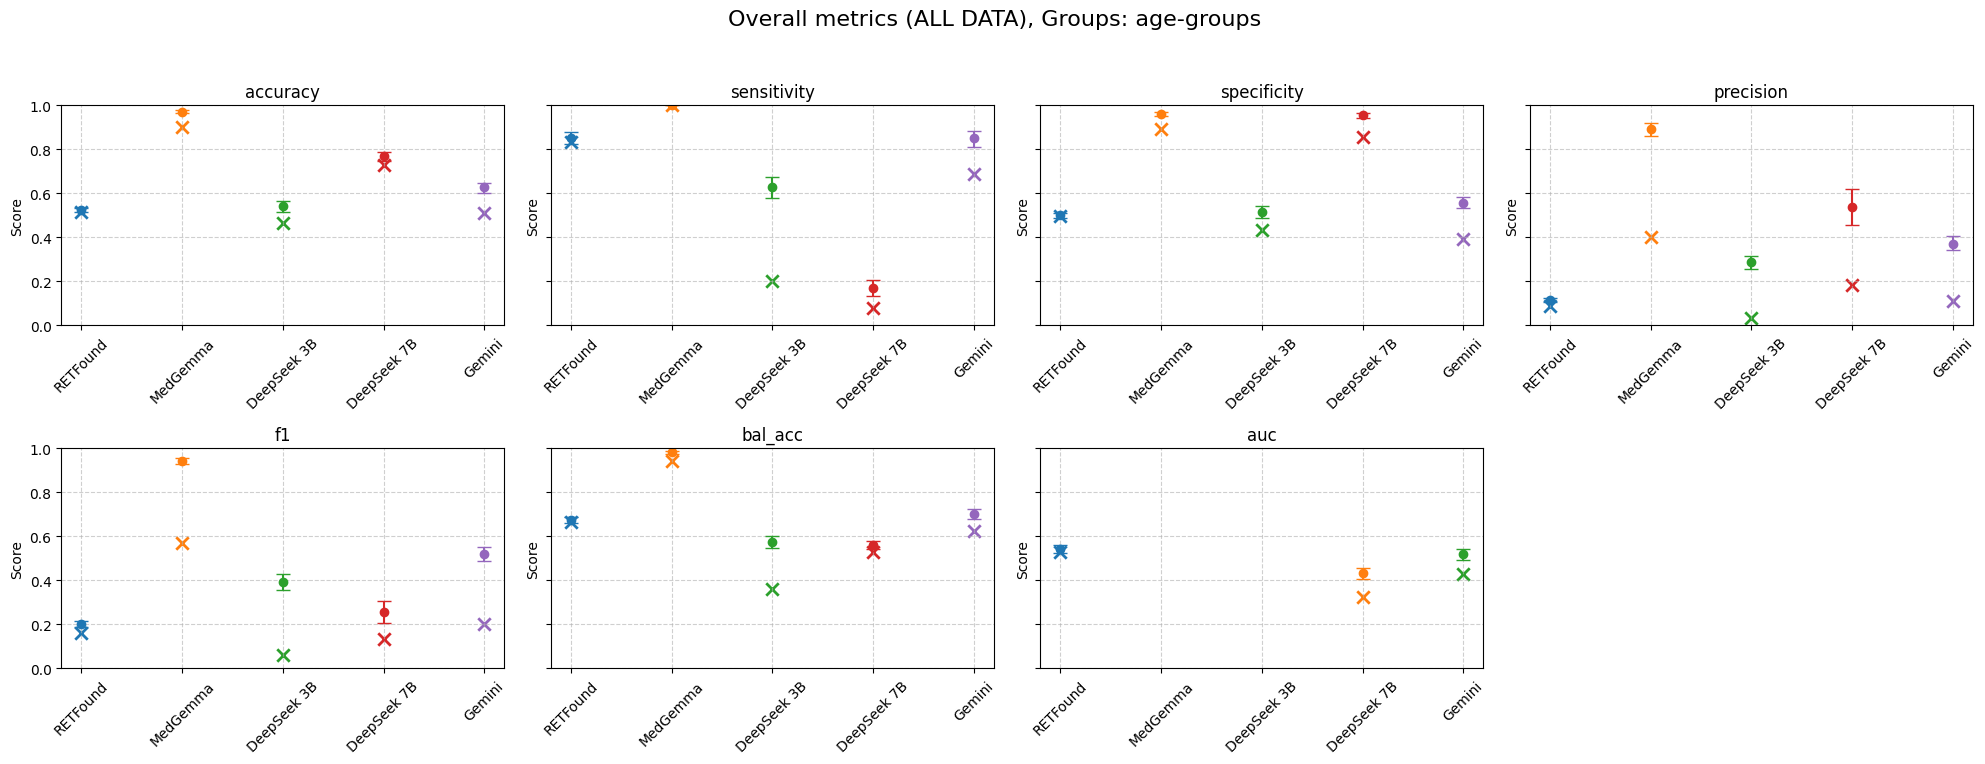

In [137]:
plot_overall_metrics_all_data_models(overall_all_models_age_1, groups="age-groups")

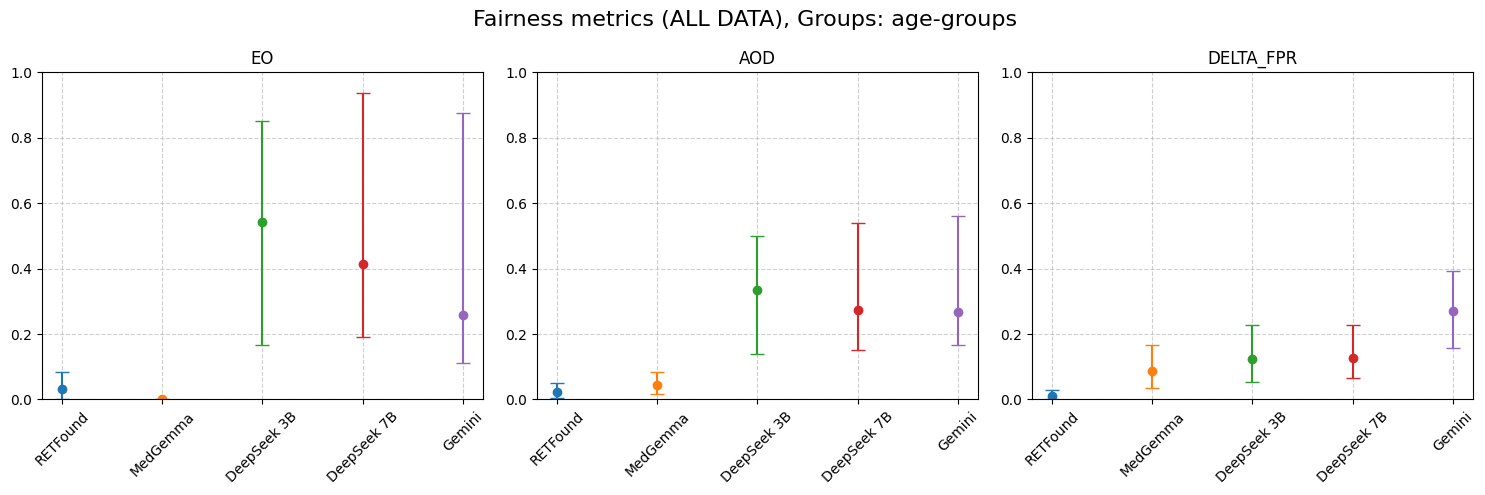

In [138]:
plot_fairness_metrics_all_data_models(fairness_all_models_age_1, groups="age-groups")

In [139]:
overall_sex_1["model"] = "RETFound"
overall_mg_sex_1["model"] = "MedGemma"
overall_ds_3b_sex_1["model"] = "DeepSeek 3B"
overall_ds_7b_sex_1["model"] = "DeepSeek 7B"
overall_gemini_sex_1["model"] = "Gemini"

fairness_sex_1["model"] = "RETFound"
fairness_mg_sex_1["model"] = "MedGemma"
fairness_ds_3b_sex_1["model"] = "DeepSeek 3B"
fairness_ds_7b_sex_1["model"] = "DeepSeek 7B"
fairness_gemini_sex_1["model"] = "Gemini"

overall_all_models_sex_1 = pd.concat([overall_sex_1, overall_mg_sex_1, overall_ds_3b_sex_1, overall_ds_7b_sex_1, overall_gemini_sex_1], ignore_index=True)
fairness_all_models_sex_1 = pd.concat([fairness_sex_1, fairness_mg_sex_1, fairness_ds_3b_sex_1, fairness_ds_7b_sex_1, fairness_gemini_sex_1], ignore_index=True)

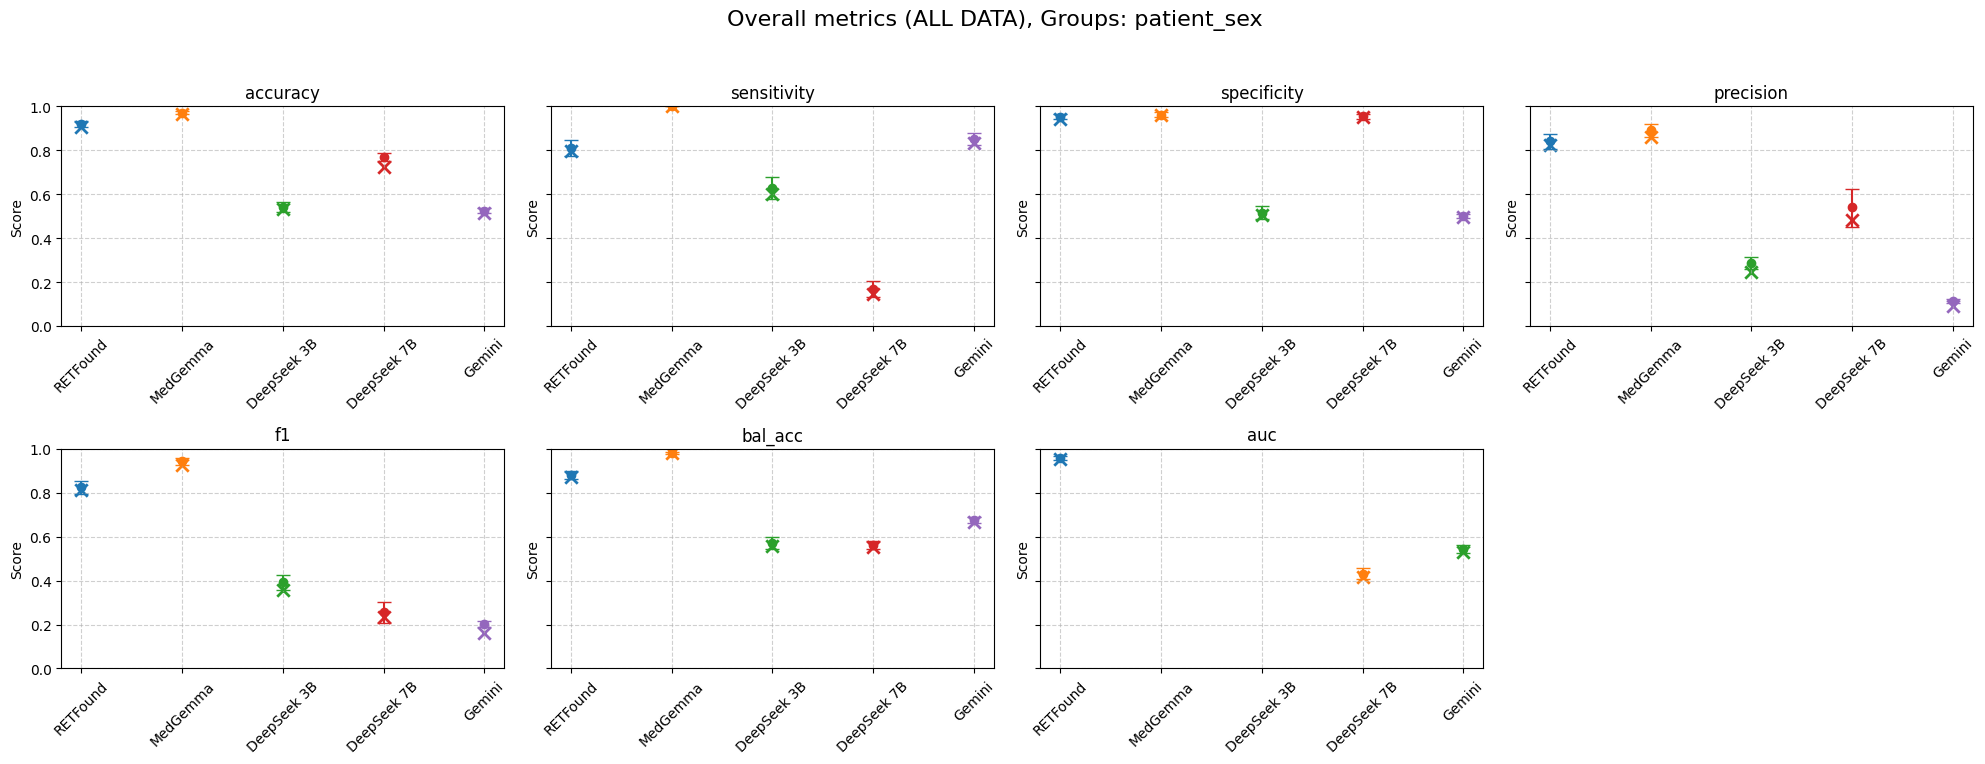

In [140]:
plot_overall_metrics_all_data_models(overall_all_models_sex_1, groups="patient_sex")

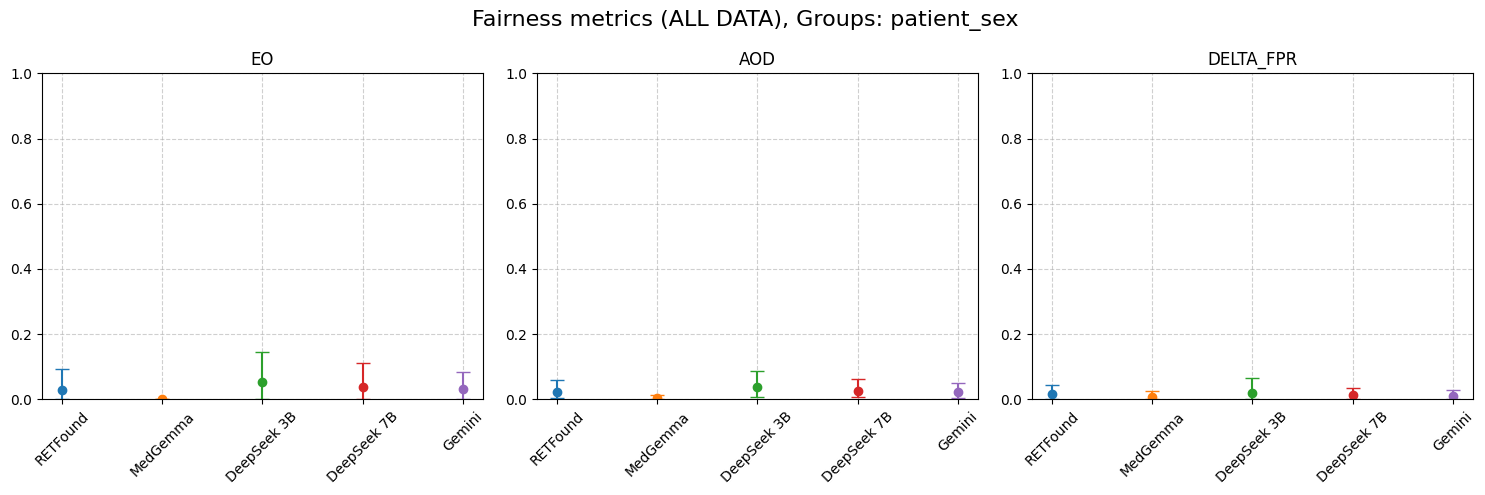

In [141]:
plot_fairness_metrics_all_data_models(fairness_all_models_sex_1, groups="patient_sex")